In [113]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [73]:
import pandas as pd
df = pd.read_csv("train.csv")
df

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


Check no-churn rate

In [74]:
len(df[df.churn == 'no'])/len(df)

0.8592941176470589

Convert four columns into categorical data

In [75]:
df["state"] = df["state"].astype('category')
df["area_code"] = df["area_code"].astype('category')
df["international_plan"] = df["international_plan"].astype('category')
df["voice_mail_plan"] = df["voice_mail_plan"].astype('category')

In [76]:
df["state"] = df["state"].cat.codes
df["area_code"] = df["area_code"].cat.codes
df["international_plan"] = df["international_plan"].cat.codes
df["voice_mail_plan"] = df["voice_mail_plan"].cat.codes

In [77]:
df

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,35,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,31,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,35,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,36,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,19,121,2,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,26,83,1,0,0,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,49,73,0,0,0,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,27,75,0,0,0,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,11,50,0,0,1,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


In [78]:
x = df.drop(['churn'], axis=1)
y = df.churn
y

0       no
1       no
2       no
3       no
4       no
        ..
4245    no
4246    no
4247    no
4248    no
4249    no
Name: churn, Length: 4250, dtype: object

In [79]:
y = y.astype('category').cat.codes
y

0       0
1       0
2       0
3       0
4       0
       ..
4245    0
4246    0
4247    0
4248    0
4249    0
Length: 4250, dtype: int8

# train_test_split

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify = y)

In [81]:
from sklearn.ensemble import RandomForestClassifier

clff=RandomForestClassifier()

clff.fit(X_train,y_train)

y_pred=clff.predict(X_test)

In [82]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9592156862745098
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1096
           1       0.98      0.72      0.83       179

    accuracy                           0.96      1275
   macro avg       0.97      0.86      0.90      1275
weighted avg       0.96      0.96      0.96      1275



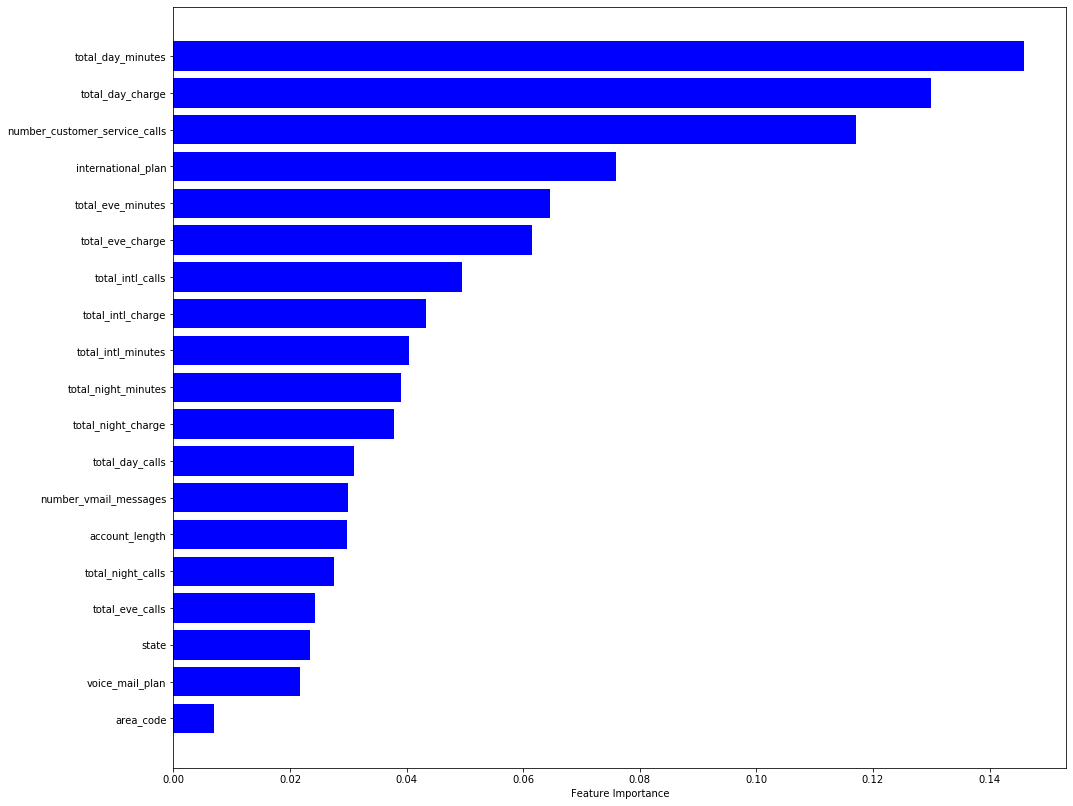

In [83]:
features = df.columns
importances = clff.feature_importances_
indexes = np.argsort(importances)

plt.figure(figsize=(16, 14))
plt.barh(range(len(indexes)), importances[indexes], color='b', align='center')
plt.yticks(range(len(indexes)), [features[i] for i in indexes])
plt.xlabel('Feature Importance')
plt.show()

# cross_val_score

In [84]:
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import std
from sklearn.metrics import confusion_matrix


model = RandomForestClassifier()

# StratifiedKFold to handle imbalanced data
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=42)

scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.958 (0.009)


In [85]:
scores

array([0.95764706, 0.96470588, 0.94352941, 0.96705882, 0.96941176,
       0.96      , 0.95058824, 0.93411765, 0.96705882, 0.96235294,
       0.96      , 0.96235294, 0.96      , 0.95764706, 0.96      ,
       0.95764706, 0.96470588, 0.97176471, 0.95058824, 0.94823529,
       0.96      , 0.95058824, 0.96470588, 0.94588235, 0.94588235,
       0.95294118, 0.96      , 0.97647059, 0.96705882, 0.95764706,
       0.94823529, 0.94588235, 0.95529412, 0.96470588, 0.95529412,
       0.95764706, 0.96235294, 0.96941176, 0.94823529, 0.97176471,
       0.94823529, 0.96      , 0.97411765, 0.96470588, 0.95764706,
       0.94117647, 0.96235294, 0.96235294, 0.95058824, 0.95529412])

In [86]:
pred_prob1 = clff.predict_proba(X_test)

auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])

print(auc_score1)

0.9164024589161197


In [87]:
print(confusion_matrix(y_test, y_pred))

[[1094    2]
 [  50  129]]


### Hyperparameter tuning

In [88]:
# from sklearn.model_selection import GridSearchCV

# parameters = [
# {
#     'bootstrap': [True, False],
#     'criterion' :['gini', 'entropy']
#     'n_estimators': [200, 300, 500],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : [4,5,6,7,8],
# }
# ]

# tuning = GridSearchCV(RandomForestClassifier(), parameters,
#                       scoring = 'f1', cv=3, n_jobs=-1)

# tuning.fit(X_train,y_train)

# tuning.best_params_, tuning.best_score_

# Generate test file for Kaggle

In [89]:
X_test_kaggle = pd.read_csv('test.csv')
X_test_kaggle = X_test_kaggle.drop(['id'], axis = 1)
X_test_kaggle

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,GA,130,area_code_415,no,no,0,119.4,99,20.30,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0
746,WA,73,area_code_408,no,no,0,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3
747,WV,152,area_code_415,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
748,DC,61,area_code_415,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1


In [90]:
X_test_kaggle["state"] = X_test_kaggle["state"].astype('category')
X_test_kaggle["area_code"] = X_test_kaggle["area_code"].astype('category')
X_test_kaggle["international_plan"] = X_test_kaggle["international_plan"].astype('category')
X_test_kaggle["voice_mail_plan"] = X_test_kaggle["voice_mail_plan"].astype('category')

X_test_kaggle["state"] = X_test_kaggle["state"].cat.codes
X_test_kaggle["area_code"] = X_test_kaggle["area_code"].cat.codes
X_test_kaggle["international_plan"] = X_test_kaggle["international_plan"].cat.codes
X_test_kaggle["voice_mail_plan"] = X_test_kaggle["voice_mail_plan"].cat.codes

In [91]:
X_test_kaggle

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,16,128,1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,1,118,2,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,12,62,1,0,0,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,46,93,2,0,0,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,29,174,1,0,0,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,10,130,1,0,0,0,119.4,99,20.30,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0
746,47,73,0,0,0,0,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3
747,49,152,1,0,0,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
748,7,61,1,0,0,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1


In [92]:
clff=RandomForestClassifier()

clff.fit(X_train,y_train)

y_pred_kaggle=clff.predict(X_test_kaggle)
y_pred_kaggle

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [93]:
y_pred_kaggle = pd.DataFrame(y_pred_kaggle).replace([0,1], ["no","yes"])
y_pred_kaggle['id'] = np.arange(1, 751, 1)
y_pred_kaggle.columns = ['churn','id']
sequence = ['id','churn']

In [94]:
kaggle_submission = y_pred_kaggle[sequence]
kaggle_submission

,id,churn
0,1,no
1,2,no
2,3,yes
3,4,no
4,5,no
...,...,...
745,746,no
746,747,no
747,748,no
748,749,no


In [95]:
kaggle_submission.to_csv (r'kaggle_submission.csv', index = False, header=True)

# Drop correlated columns

In [96]:
df.corr()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
state,1.000000,0.008818,0.020713,0.003822,-0.034752,-0.030857,0.014263,-0.009890,0.014262,0.001603,-0.009116,0.001603,0.004827,-0.006597,0.004815,-0.010260,0.007469,-0.010284,-0.020421
account_length,0.008818,1.000000,-0.023530,0.027050,0.001663,-0.006626,-0.001612,0.023002,-0.001613,-0.010326,0.005535,-0.010322,-0.009916,-0.001846,-0.009942,0.004539,0.013690,0.004494,0.001002
area_code,0.020713,-0.023530,1.000000,0.027133,-0.001622,-0.002468,0.006344,-0.009064,0.006342,-0.000244,-0.014031,-0.000229,0.019034,0.022869,0.019031,0.013641,-0.007027,0.013518,0.011064
international_plan,0.003822,0.027050,0.027133,1.000000,0.000714,0.004808,0.040059,0.009776,0.040061,0.023484,-0.003004,0.023479,-0.020694,0.007153,-0.020694,0.023815,0.006956,0.023799,-0.008881
voice_mail_plan,-0.034752,0.001663,-0.001622,0.000714,1.000000,0.954014,-0.000653,-0.010004,-0.000658,0.011982,0.000263,0.011989,0.017884,0.007872,0.017875,0.008098,-0.005674,0.008129,-0.021504
number_vmail_messages,-0.030857,-0.006626,-0.002468,0.004808,0.954014,1.000000,0.002000,-0.006920,0.001994,0.010725,0.003593,0.010736,0.018308,0.001977,0.018300,0.005220,0.006585,0.005249,-0.015303
total_day_minutes,0.014263,-0.001612,0.006344,0.040059,-0.000653,0.002000,1.000000,0.000747,1.000000,-0.013248,0.005986,-0.013258,0.010049,-0.004812,0.010036,-0.021369,0.003859,-0.021291,-0.002925
total_day_calls,-0.009890,0.023002,-0.009064,0.009776,-0.010004,-0.006920,0.000747,1.000000,0.000751,0.008661,0.003739,0.008663,0.002206,-0.004815,0.002200,0.008834,0.009377,0.008909,-0.015845
total_day_charge,0.014262,-0.001613,0.006342,0.040061,-0.000658,0.001994,1.000000,0.000751,1.000000,-0.013247,0.005985,-0.013257,0.010053,-0.004816,0.010040,-0.021374,0.003853,-0.021296,-0.002932
total_eve_minutes,0.001603,-0.010326,-0.000244,0.023484,0.011982,0.010725,-0.013248,0.008661,-0.013247,1.000000,0.003101,1.000000,-0.014018,0.011973,-0.014031,-0.003509,0.012239,-0.003460,-0.010063


The following columns are chosen as they were calculated using the temporal features, as demonstrated by the correlation table, where they are 100% correlated to the their respective temporal features.

In [97]:
df_dropped = df.drop(['total_day_charge','total_eve_charge','total_night_charge','total_intl_charge'], axis=1)
df_dropped

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,churn
0,35,107,1,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,no
1,31,137,1,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,no
2,35,84,0,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,no
3,36,75,1,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,no
4,19,121,2,0,1,24,218.2,88,348.5,108,212.6,118,7.5,7,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,26,83,1,0,0,0,188.3,70,243.8,88,213.7,79,10.3,6,0,no
4246,49,73,0,0,0,0,177.9,89,131.2,82,186.2,89,11.5,6,3,no
4247,27,75,0,0,0,0,170.7,101,193.1,126,129.1,104,6.9,7,1,no
4248,11,50,0,0,1,40,235.7,127,223.0,126,297.5,116,9.9,5,2,no


In [98]:
x_dropped = df_dropped.drop(['churn'], axis=1)
y_dropped = df_dropped.churn

In [99]:
y_dropped = y_dropped.astype('category').cat.codes

# train_test_split

In [100]:
from sklearn.model_selection import train_test_split

X_train_dropped, X_test_dropped, y_train_dropped, y_test_dropped = train_test_split(x_dropped, y_dropped, test_size=0.3, random_state=42, stratify = y)

In [101]:
from sklearn.ensemble import RandomForestClassifier

clff_dropped=RandomForestClassifier()

clff_dropped.fit(X_train_dropped,y_train_dropped)

y_pred_dropped=clff_dropped.predict(X_test_dropped)

In [102]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print("Accuracy:",metrics.accuracy_score(y_test_dropped, y_pred_dropped))
print(classification_report(y_test_dropped, y_pred_dropped))

Accuracy: 0.9513725490196079
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1096
           1       0.99      0.66      0.79       179

    accuracy                           0.95      1275
   macro avg       0.97      0.83      0.88      1275
weighted avg       0.95      0.95      0.95      1275



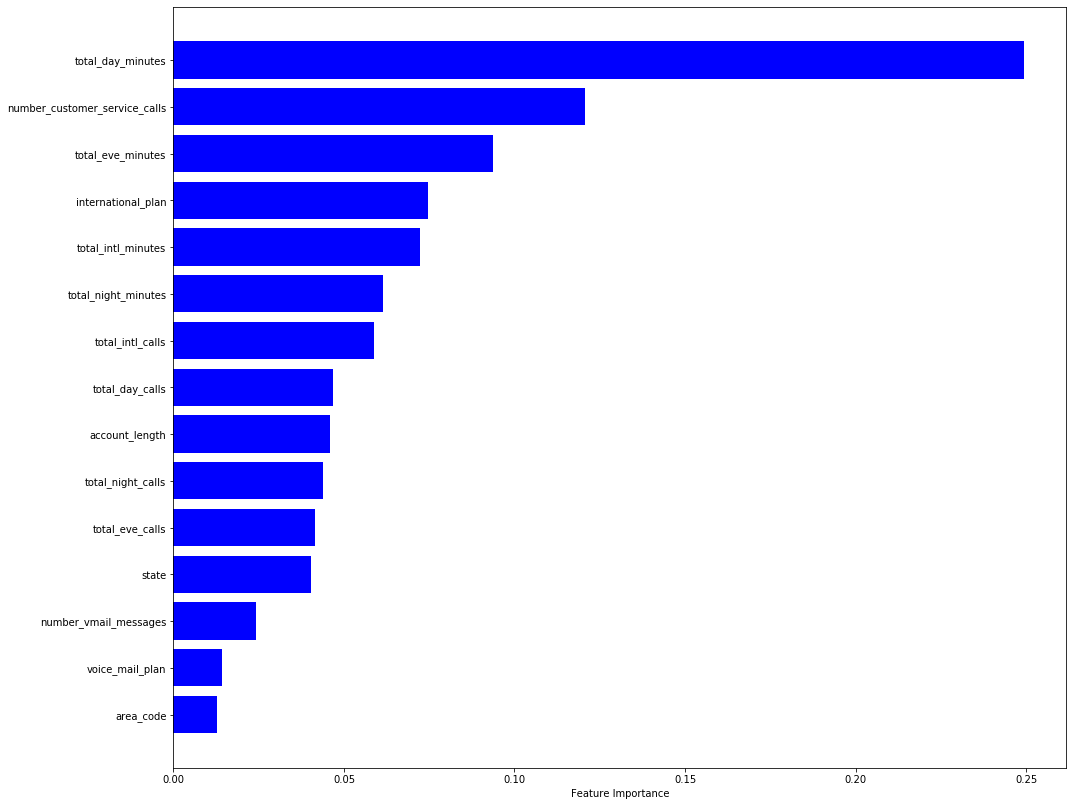

In [103]:
features_dropped = df_dropped.columns
importances_dropped = clff_dropped.feature_importances_
indexes_dropped = np.argsort(importances_dropped)

plt.figure(figsize=(16, 14))
plt.barh(range(len(indexes_dropped)), importances_dropped[indexes_dropped], color='b', align='center')
plt.yticks(range(len(indexes_dropped)), [features_dropped[i] for i in indexes_dropped])
plt.xlabel('Feature Importance')
plt.show()

# cross_val_score

In [104]:
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold


model = RandomForestClassifier()

# StratifiedKFold to handle imbalanced data
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=42)

scores_dropped = cross_val_score(model, x_dropped, y_dropped, scoring='accuracy', cv=cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (mean(scores_dropped), std(scores_dropped)))

Accuracy: 0.950 (0.009)


In [105]:
scores_dropped

array([0.94352941, 0.95764706, 0.93411765, 0.96470588, 0.96      ,
       0.94588235, 0.94352941, 0.93176471, 0.95294118, 0.95764706,
       0.95764706, 0.96470588, 0.95058824, 0.94823529, 0.95294118,
       0.95294118, 0.95529412, 0.96235294, 0.94352941, 0.93647059,
       0.94588235, 0.93882353, 0.95294118, 0.93176471, 0.93882353,
       0.94823529, 0.95764706, 0.96705882, 0.96235294, 0.94823529,
       0.94588235, 0.94117647, 0.94117647, 0.95529412, 0.94352941,
       0.94588235, 0.95294118, 0.96      , 0.95294118, 0.96235294,
       0.93882353, 0.95529412, 0.95294118, 0.95764706, 0.95529412,
       0.94117647, 0.96      , 0.95529412, 0.93647059, 0.95529412])

In [106]:
pred_prob1_dropped = clff_dropped.predict_proba(X_test_dropped)

auc_score1_dropped = roc_auc_score(y_test_dropped, pred_prob1_dropped[:,1])

print(auc_score1_dropped)

0.9159921298372957


# Use RFECV to view the most optimal number of features using Random Forest as the base algorithm

In [107]:
from sklearn.feature_selection import RFECV

rfc = RandomForestClassifier()
clf = RFECV(estimator=rfc, step=1, cv=5, scoring='accuracy')
clf.fit(x, y)

RFECV(cv=5,
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [108]:
print("Optimal number of features: ", clf.n_features_)

Optimal number of features:  13


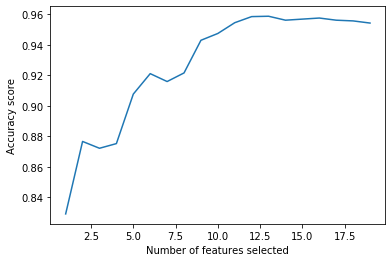

In [109]:
plt.plot(range(1, len(x.columns)+1), clf.grid_scores_)
plt.xlabel("Number of features selected")
plt.ylabel("Accuracy score")
plt.show()

In [110]:
clf.estimator_.feature_importances_

array([0.03600908, 0.08613261, 0.05098991, 0.1576137 , 0.15557611,
       0.07142966, 0.0741714 , 0.05032607, 0.04827187, 0.04633954,
       0.05747716, 0.04415954, 0.12150336])

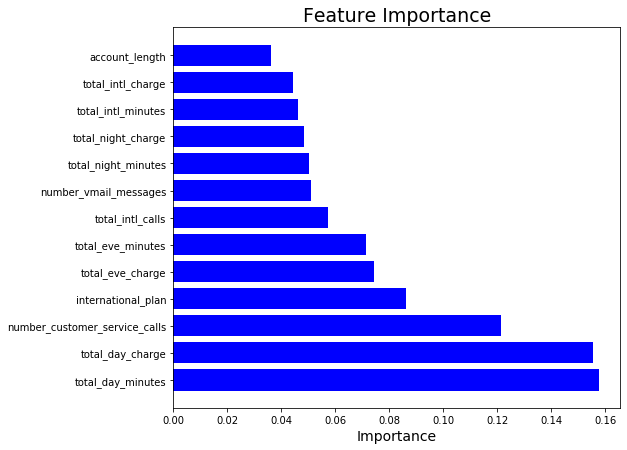

In [111]:
importance_set = pd.DataFrame()
b = clf.support_
b = b.tolist()
importance_set['attr'] = x.loc[:, b].columns
importance_set['importance'] = clf.estimator_.feature_importances_

importance_set = importance_set.sort_values(by='importance', ascending=False)

plt.figure(figsize=(8, 7))
plt.barh(y=importance_set['attr'], width=importance_set['importance'], color='blue')
plt.title('Feature Importance', fontsize=19)
plt.xlabel('Importance', fontsize=14)
plt.show()

In [112]:
max(clf.grid_scores_)

0.9588235294117646